<a href="https://colab.research.google.com/github/andrewhslr419/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/NHNES_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following data represents the National Health and Nutrition Examination Survey. The survey measures health and nutrition in adults and children in America. This survey shows that in fact your health as a child has a major impact on your health as an adult. 

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from google.colab import files
import seaborn as sns
# files.upload()

In [90]:
survey = pd.read_csv('NHNES.csv')
survey.head()



,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic Black,Percentage,%,67.9,NaN,NaN,56.1,77.8,C2,T8,NH010,BOC04,RAC02,NaN,NaN
1,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Overall,Overall,Percentage,%,75.7,NaN,NaN,62.5,85.3,C2,T8,NH010,BOC01,OVR01,NaN,NaN
2,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic White,Percentage,%,78.3,NaN,NaN,56.9,90.8,C2,T8,NH010,BOC04,RAC01,NaN,NaN
3,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Hispanic,Percentage,%,54.8,NaN,NaN,38.6,70.1,C2,T8,NH010,BOC04,RAC04,NaN,NaN
4,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Gender,Female,Percentage,%,73.8,NaN,NaN,61.2,83.4,C2,T8,NH010,BOC02,GEN02,NaN,NaN


In [91]:
survey.shape

(4824, 27)

*** After the shape we start counting values***

In [92]:
survey['Data_Value'].value_counts()

30.4    23
2.7     21
2.8     18
3.2     17
18.6    17
        ..
90.8     1
52.3     1
89.9     1
80.2     1
78.2     1
Name: Data_Value, Length: 975, dtype: int64

In [93]:
survey['PriorityArea1'].value_counts()

None               3766
Million Hearts®     722
Name: PriorityArea1, dtype: int64

In [94]:
survey['Confidence_limit_High'].value_counts()

30.3    21
23.9    20
3.5     19
35.0    19
18.2    19
        ..
44.6     1
88.1     1
92.2     1
12.4     1
81.8     1
Name: Confidence_limit_High, Length: 1003, dtype: int64

***Calculate the mean by grouping***


In [95]:
survey.groupby(['Data_Value', 'Confidence_limit_High']).mean() 

Confidence_limit_Low  LocationID  GeoLocation
Data_Value Confidence_limit_High                                               
0.0        0.2                                     0.0         NaN          NaN
0.1        0.4                                     0.1         NaN          NaN
           0.7                                     0.0         NaN          NaN
0.2        0.5                                     0.1         NaN          NaN
           0.6                                     0.0         NaN          NaN
...                                                ...         ...          ...
4205.8     4385.5                               4026.2         NaN          NaN
4234.3     4321.0                               4147.7         NaN          NaN
4240.5     4343.0                               4137.9         NaN          NaN
4240.8     4343.3                               4138.4         NaN          NaN
4341.0     4464.6                               4217.3         NaN          NaN

[2901 rows x 3 columns]

**Above** we see there is huge spikes in the data around 4000 this shows where the spikes happen in the graph are the columns are most closely related to the mean. 

**Here** the quaries into the data show where the values are equal to eachother, the second shows there are no Data Values greater than the confidence interval and the third that all data values are less than the high confidence limit


In [96]:
survey.query('Data_Value == Confidence_limit_High')

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation


In [97]:
survey.query('Data_Value > Confidence_limit_High')

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation


In [98]:
survey.query('Data_Value < Confidence_limit_High')

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic Black,Percentage,%,67.9,NaN,NaN,56.1,77.8,C2,T8,NH010,BOC04,RAC02,NaN,NaN
1,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Overall,Overall,Percentage,%,75.7,NaN,NaN,62.5,85.3,C2,T8,NH010,BOC01,OVR01,NaN,NaN
2,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic White,Percentage,%,78.3,NaN,NaN,56.9,90.8,C2,T8,NH010,BOC04,RAC01,NaN,NaN
3,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Hispanic,Percentage,%,54.8,NaN,NaN,38.6,70.1,C2,T8,NH010,BOC04,RAC04,NaN,NaN
4,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Gender,Female,Percentage,%,73.8,NaN,NaN,61.2,83.4,C2,T8,NH010,BOC02,GEN02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Age,35+,Mean,Mean,3476.6,NaN,NaN,3391.1,3562.2,C2,T12,NHP3N19,BOC03,AGE07,NaN,NaN
4820,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Race,White,Mean,Mean,3386.0,NaN,NaN,3222.9,3549.1,C2,T12,NHP3N19,BOC04,RAC05,NaN,NaN
4821,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Age,65+,Mean,Mean,3048.0,NaN,NaN,2948.8,3147.2,C2,T12,NHP3N19,BOC03,AGE06,NaN,NaN
4822,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Gender,Female,Mean,Mean,3006.7,NaN,NaN,2938.6,3074.9,C2,T12,NHP3N19,BOC02,GEN02,NaN,NaN


In [99]:
survey.interpolate()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic Black,Percentage,%,67.9,NaN,NaN,56.1,77.8,C2,T8,NH010,BOC04,RAC02,NaN,NaN
1,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Overall,Overall,Percentage,%,75.7,NaN,NaN,62.5,85.3,C2,T8,NH010,BOC01,OVR01,NaN,NaN
2,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic White,Percentage,%,78.3,NaN,NaN,56.9,90.8,C2,T8,NH010,BOC04,RAC01,NaN,NaN
3,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Hispanic,Percentage,%,54.8,NaN,NaN,38.6,70.1,C2,T8,NH010,BOC04,RAC04,NaN,NaN
4,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,None,None,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Gender,Female,Percentage,%,73.8,NaN,NaN,61.2,83.4,C2,T8,NH010,BOC02,GEN02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Age,35+,Mean,Mean,3476.6,NaN,NaN,3391.1,3562.2,C2,T12,NHP3N19,BOC03,AGE07,NaN,NaN
4820,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Race,White,Mean,Mean,3386.0,NaN,NaN,3222.9,3549.1,C2,T12,NHP3N19,BOC04,RAC05,NaN,NaN
4821,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Age,65+,Mean,Mean,3048.0,NaN,NaN,2948.8,3147.2,C2,T12,NHP3N19,BOC03,AGE06,NaN,NaN
4822,2011-2012,US,United States,NHANES,None,None,Healthy People 2020,None,Risk Factors,Nutrition,Nutrition and Weight Status Objective 19: Mean...,Gender,Female,Mean,Mean,3006.7,NaN,NaN,2938.6,3074.9,C2,T12,NHP3N19,BOC02,GEN02,NaN,NaN


In [100]:
len(survey)

4824

**Checking how many unique values are in the columns**

In [101]:
survey['Data_Value'].nunique()

975

In [102]:
survey['Confidence_limit_High'].nunique()

1003

**Fill the missing intergers**


In [0]:
survey['PriorityArea4'].replace('None', '1', inplace=True)

In [0]:
survey['Data_Value_Footnote_Symbol'].fillna(14, inplace=True)

In [0]:
survey['Data_Value_Footnote'].fillna(22, inplace=True)

In [0]:
survey['PriorityArea3'].replace('None', 'Healthy People 2020', inplace=True)

In [0]:
survey['LocationID'].fillna(10, inplace=True)

In [0]:
survey['GeoLocation'].fillna(20, inplace=True)

In [0]:
survey['PriorityArea1'].fillna(10, inplace=True)

In [0]:
survey['PriorityArea2'].fillna(50, inplace=True)

In [0]:
survey['PriorityArea3'].fillna(20, inplace=True)

In [0]:
survey['PriorityArea4'].fillna(40, inplace=True)

In [0]:
survey['Confidence_limit_Low'].fillna(12, inplace=True)

In [0]:
survey['Confidence_limit_High'].fillna(13, inplace=True)

**I experimented with values other than 0 to fill the NaNs to see if it effected the display in the plots below. It didnt.**

In [115]:
print(survey.shape)
survey['Data_Value'].fillna(17, inplace=True)
survey.head()


(4824, 27)


,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic Black,Percentage,%,67.9,14,22,56.1,77.8,C2,T8,NH010,BOC04,RAC02,10.0,20.0
1,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Overall,Overall,Percentage,%,75.7,14,22,62.5,85.3,C2,T8,NH010,BOC01,OVR01,10.0,20.0
2,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic White,Percentage,%,78.3,14,22,56.9,90.8,C2,T8,NH010,BOC04,RAC01,10.0,20.0
3,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Hispanic,Percentage,%,54.8,14,22,38.6,70.1,C2,T8,NH010,BOC04,RAC04,10.0,20.0
4,2011-2012,US,United States,NHANES,Million Hearts®,ABCS,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Gender,Female,Percentage,%,73.8,14,22,61.2,83.4,C2,T8,NH010,BOC02,GEN02,10.0,20.0


In [116]:
survey.isnull().sum()

Year                          0
LocationAbbr                  0
LocationDesc                  0
DataSource                    0
PriorityArea1                 0
PriorityArea2                 0
PriorityArea3                 0
PriorityArea4                 0
Category                      0
Topic                         0
Indicator                     0
Break_Out_Category            0
Break_Out                     0
Data_Value_Type               0
Data_Value_Unit               0
Data_Value                    0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Confidence_limit_Low          0
Confidence_limit_High         0
CategoryId                    0
TopicId                       0
IndicatorID                   0
BreakOutCategoryId            0
BreakOutId                    0
LocationID                    0
GeoLocation                   0
dtype: int64

**A corrolation matrix indicates there are static columns in the dataframe. Here I drop them.**

These columns are catigorical because there is only one value all the way down the column. Geolocation is America, the only country this study was conducted in.

In [117]:
survey.corr()

,Data_Value,Confidence_limit_Low,Confidence_limit_High,LocationID,GeoLocation
Data_Value,1.000000,0.999866,0.999881,NaN,NaN
Confidence_limit_Low,0.999866,1.000000,0.999509,NaN,NaN
Confidence_limit_High,0.999881,0.999509,1.000000,NaN,NaN
LocationID,NaN,NaN,NaN,NaN,NaN
GeoLocation,NaN,NaN,NaN,NaN,NaN


In [0]:
survey = survey.drop('GeoLocation', axis=1)

In [0]:
survey = survey.drop('LocationID', axis=1)

In [0]:
survey = survey.drop('PriorityArea2', axis=1)


In [121]:
survey.corr()

,Data_Value,Confidence_limit_Low,Confidence_limit_High
Data_Value,1.000000,0.999866,0.999881
Confidence_limit_Low,0.999866,1.000000,0.999509
Confidence_limit_High,0.999881,0.999509,1.000000


In [122]:
survey.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,CategoryId,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId
0,2011-2012,US,United States,NHANES,Million Hearts®,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic Black,Percentage,%,67.9,14,22,56.1,77.8,C2,T8,NH010,BOC04,RAC02
1,2011-2012,US,United States,NHANES,Million Hearts®,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Overall,Overall,Percentage,%,75.7,14,22,62.5,85.3,C2,T8,NH010,BOC01,OVR01
2,2011-2012,US,United States,NHANES,Million Hearts®,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Non-Hispanic White,Percentage,%,78.3,14,22,56.9,90.8,C2,T8,NH010,BOC04,RAC01
3,2011-2012,US,United States,NHANES,Million Hearts®,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Race,Hispanic,Percentage,%,54.8,14,22,38.6,70.1,C2,T8,NH010,BOC04,RAC04
4,2011-2012,US,United States,NHANES,Million Hearts®,Healthy People 2020,1,Risk Factors,Aspirin use,Prevalence of aspirin use for secondary preven...,Gender,Female,Percentage,%,73.8,14,22,61.2,83.4,C2,T8,NH010,BOC02,GEN02


**Datatype analysis and conversion**


In [0]:
survey['Data_Value']=survey.Data_Value.astype(int)

In [0]:
survey['Confidence_limit_Low']=survey.Confidence_limit_Low.astype(int)

In [0]:
survey['Confidence_limit_High']=survey.Confidence_limit_High.astype(int)

In [0]:
'''survey['Category'] = pd.to_numeric(survey['Category'],errors='coerce')'''
'''survey['PriorityArea4'] = pd.to_numeric(survey['PriorityArea4'],errors='coerce')'''
these lines convert object to float 

In [128]:
survey.dtypes

Year                          object
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
PriorityArea1                 object
PriorityArea3                 object
PriorityArea4                 object
Category                      object
Topic                         object
Indicator                     object
Break_Out_Category            object
Break_Out                     object
Data_Value_Type               object
Data_Value_Unit               object
Data_Value                     int64
Data_Value_Footnote_Symbol    object
Data_Value_Footnote           object
Confidence_limit_Low           int64
Confidence_limit_High          int64
CategoryId                    object
TopicId                       object
IndicatorID                   object
BreakOutCategoryId            object
BreakOutId                    object
dtype: object

In [129]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 24 columns):
Year                          4824 non-null object
LocationAbbr                  4824 non-null object
LocationDesc                  4824 non-null object
DataSource                    4824 non-null object
PriorityArea1                 4824 non-null object
PriorityArea3                 4824 non-null object
PriorityArea4                 4824 non-null object
Category                      4824 non-null object
Topic                         4824 non-null object
Indicator                     4824 non-null object
Break_Out_Category            4824 non-null object
Break_Out                     4824 non-null object
Data_Value_Type               4824 non-null object
Data_Value_Unit               4824 non-null object
Data_Value                    4824 non-null int64
Data_Value_Footnote_Symbol    4824 non-null object
Data_Value_Footnote           4824 non-null object
Confidence_limit_Low       

**Basic Plotting**

These graphs show that the data is consitantly related to itself 

Text(0.5, 0, 'Nutrician')

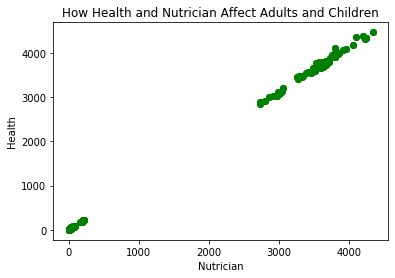

In [130]:
plt.scatter(survey['Data_Value'], survey['Confidence_limit_High'], color='Green')
plt.title('How Health and Nutrician Affect Adults and Children')
plt.ylabel('Health')
plt.xlabel('Nutrician')

Text(0.5, 0, 'Nutrician')

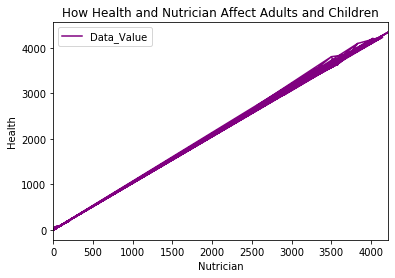

In [131]:
survey.plot(x='Confidence_limit_Low', y='Data_Value', color='Purple')
plt.title('How Health and Nutrician Affect Adults and Children')
plt.ylabel('Health')
plt.xlabel('Nutrician')

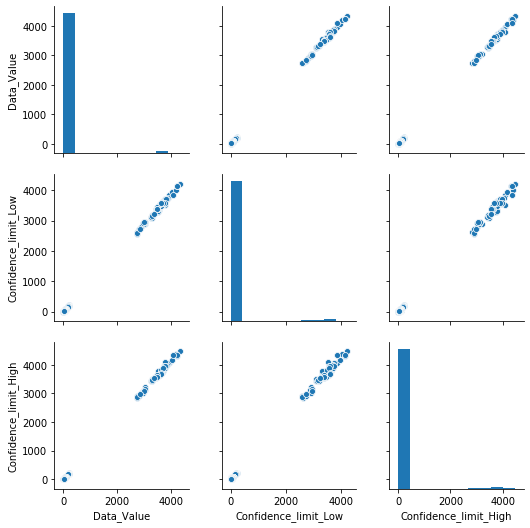

In [132]:
sns.pairplot(survey)

Text(0.5, 0, 'Nutrician')

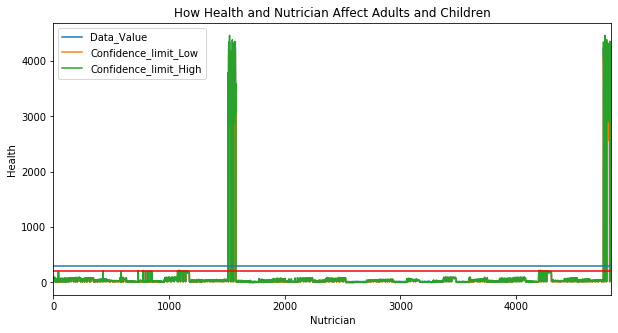

In [133]:
ax = survey.plot(figsize=(10,5))
ax.axhline(y=200, color='Red')
ax.axhline(y=300)
plt.title('How Health and Nutrician Affect Adults and Children')
plt.ylabel('Health')
plt.xlabel('Nutrician')

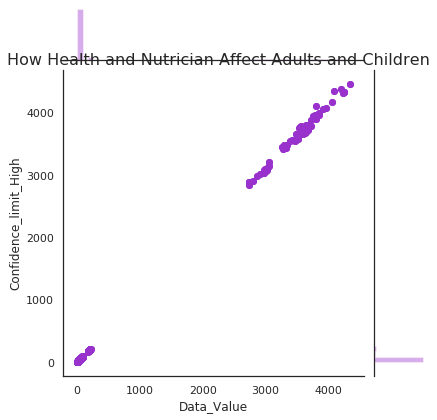

In [137]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Data_Value', y='Confidence_limit_High', data=survey, 
              color='darkorchid')

plt.title('How Health and Nutrician Affect Adults and Children',y=30,x=-3, fontsize = 16)
'''The plot title couldnt be adjusted above or below where it started evey with y=30'''
plt.show()

This jointplot shows the values corrolate all the way up and also shows the spikes in the data around the edges. 

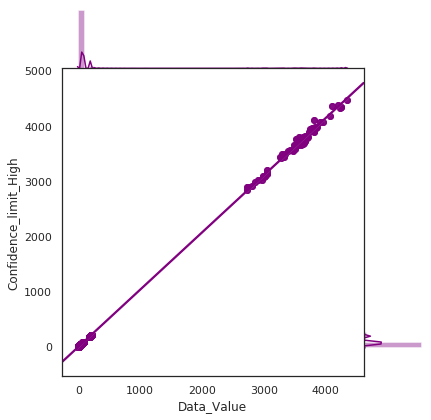

In [135]:
sns.jointplot(x=survey["Data_Value"], y=survey["Confidence_limit_High"], kind='reg',space=0, color='purple')
# plt.title('How Health and Nutrician Affect Adults and Children',y=10.3, fontsize = 16)

Text(0.5, 1, 'How Health and Nutrician Affect Adults and Children')

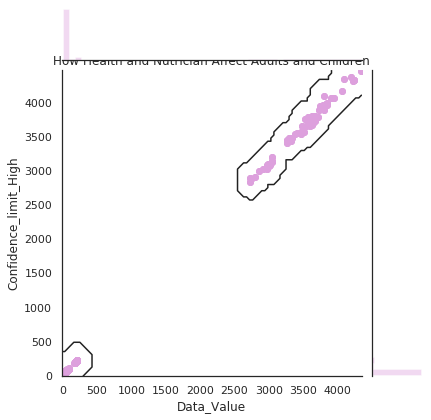

In [136]:
g = (sns.jointplot("Data_Value", "Confidence_limit_High",
...                    data=survey, color="plum")
...         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.title('How Health and Nutrician Affect Adults and Children')